# EXEMPLO - AQUISIÇÃO E AMOSTRAGEM

## Importar as bibliotecas necessárias

In [1]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy import misc

## Create output folder

In [2]:
out_path = 'sampling'
if not os.path.exists(out_path):
    os.mkdir(out_path)

## Carrega a imagem

In [3]:
# im = imageio.imread('./images/arvore_800x800.png')
im = imageio.imread('./images/arvore_02_512x512.png')

Se a imagem for RGB, verificar se possui canal de transparência. Caso possua, remover o canal de transparência.

In [4]:
# Se imagem possui mais de três canais. Remover o canal de transparência.
if im.ndim > 2:
    if im.shape[2] > 3:
        im = im[:,:,0:3]

Imprime algumas informações sobre a imagem.

In [5]:
print(im.shape)
print(im.dtype)
print(im.min(), im.max())

(512, 512, 3)
uint8
0 255


Plota a imagem na tela.

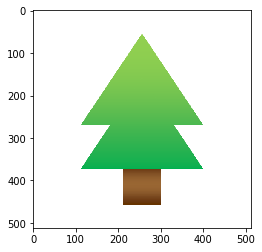

In [6]:
plt.imshow(im)

## Recorta a imagem em uma grade com 'num_cols' x 'num_rows'

In [7]:
l = im.shape[0]//16
w = im.shape[1]//16

# Cria uma nova imagem em branco.
im_new = np.zeros([16, 16, 3], dtype=np.uint8)

c_i = 0 # Contador de linhas
c_j = 0 # Contador de colunas

for i in range(0, im.shape[0], l):
    # TEST
    ### print('--->' + str(i))
    
    for j in range(0, im.shape[1], w):
        # TEST
        ### print(i, j)
        
        im_temp = im[i:i+l, j:j+w, :]
        
        # Calcula a média dos pixels da região para cada canal.
        im_new[c_i, c_j, 0] = im_temp[:,:,0].mean()
        im_new[c_i, c_j, 1] = im_temp[:,:,1].mean()
        im_new[c_i, c_j, 2] = im_temp[:,:,2].mean()
        
        # Incrementa a coluna
        c_j = c_j + 1
        
    # Incrementa a linha
    c_i = c_i + 1       
    # Inicializa a coluna
    c_j = 0

In [8]:
# Canal R
print(im_new[:,:,0])

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 252 252 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 197 197 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 231 142 142 230 255 255 255 255 255 255]
 [255 255 255 255 255 251 153 133 133 153 251 255 255 255 255 255]
 [255 255 255 255 255 184 123 123 123 123 184 255 255 255 255 255]
 [255 255 255 255 223 111 109 109 109 109 111 222 255 255 255 255]
 [255 255 255 249 118  92  92  92  92  92  92 117 249 255 255 255]
 [255 255 255 228 177 122  73  73  73  73 122 177 227 255 255 255]
 [255 255 255 255 231  65  53  53  53  53  65 231 255 255 255 255]
 [255 255 255 254  95  34  34  34  34  34  34  94 254 255 255 255]
 [255 255 255 211  97  97  78  50  50  78  97  97 210 255 255 255]
 [255 255 255 255 255 255 210 145 145 210 255 255 255 255 255 255]
 [255 255 255 255 255 255 204 131 131 204 255 255 255 255 255 255]
 [255 255 255 255 255 255 237 212 212 237 255 255 255 255 255 

In [9]:
# Canal G
print(im_new[:,:,1])

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 253 253 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 230 229 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 244 206 206 244 255 255 255 255 255 255]
 [255 255 255 255 255 253 211 202 202 211 253 255 255 255 255 255]
 [255 255 255 255 255 225 198 198 198 198 224 255 255 255 255 255]
 [255 255 255 255 241 194 193 193 193 193 194 241 255 255 255 255]
 [255 255 255 252 199 188 188 188 188 188 188 198 252 255 255 255]
 [255 255 255 244 224 202 183 183 183 183 202 224 244 255 255 255]
 [255 255 255 255 246 184 179 179 179 179 184 246 255 255 255 255]
 [255 255 255 254 199 177 177 177 177 177 177 198 254 255 255 255]
 [255 255 255 240 203 203 177 139 139 177 203 203 240 255 255 255]
 [255 255 255 255 255 255 190  95  95 190 255 255 255 255 255 255]
 [255 255 255 255 255 255 184  81  81 184 255 255 255 255 255 255]
 [255 255 255 255 255 255 232 198 198 232 255 255 255 255 255 

In [10]:
# Canal B
print(im_new[:,:,2])

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 250 250 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 164 163 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 219  82  82 218 255 255 255 255 255 255]
 [255 255 255 255 255 250 109  80  80 109 249 255 255 255 255 255]
 [255 255 255 255 255 162  80  80  80  80 161 255 255 255 255 255]
 [255 255 255 255 217  82  80  80  80  80  82 217 255 255 255 255]
 [255 255 255 249 108  80  80  80  80  80  80 108 249 255 255 255]
 [255 255 255 228 178 126  80  80  80  80 126 178 227 255 255 255]
 [255 255 255 255 235  90  80  80  80  80  90 235 255 255 255 255]
 [255 255 255 254 129  80  80  80  80  80  80 128 254 255 255 255]
 [255 255 255 223 140 140 108  62  62 108 140 140 222 255 255 255]
 [255 255 255 255 255 255 170  46  46 170 255 255 255 255 255 255]
 [255 255 255 255 255 255 166  36  36 166 255 255 255 255 255 255]
 [255 255 255 255 255 255 226 185 185 226 255 255 255 255 255 

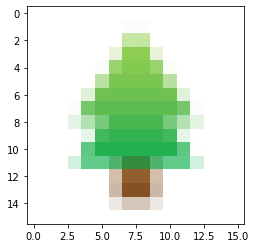

In [16]:
plt.imshow(im_new)

## Interpola as imagens usando vizinhos mais próximos

In [12]:
im_new_ok = np.array(Image.fromarray(im_new).resize(size=(512, 512), resample=PIL.Image.NEAREST))

In [13]:
print(im_new_ok.dtype)
print(im_new_ok.shape)

uint8
(800, 800, 3)


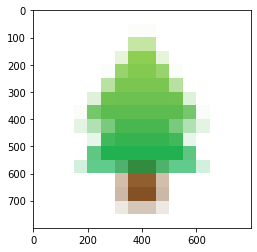

In [14]:
plt.imshow(im_new_ok)

In [15]:
# Salva as imagens em arquivo.
imageio.imsave(out_path + '/' + 'arvore_512x512.png', im)
imageio.imsave(out_path + '/' + 'arvore_16x16.png', im_new)
imageio.imsave(out_path + '/' + 'arvore_512x512_ok.png', im_new_ok)